Number of detected components (excluding background): 5


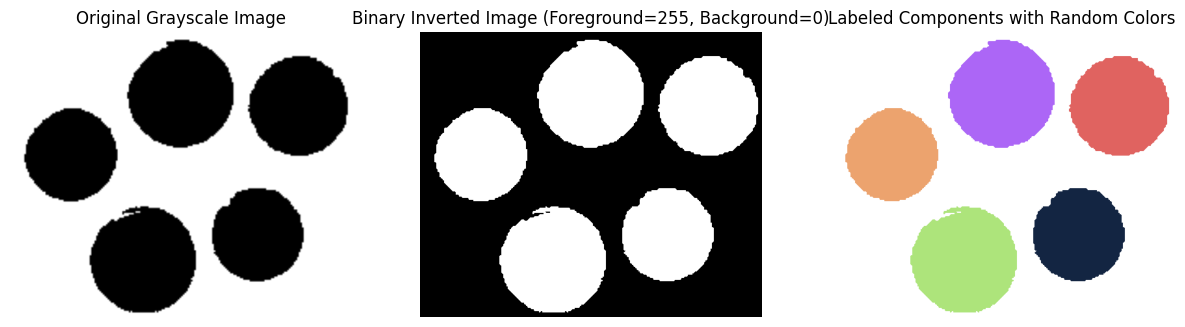

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

def connected_components_labeling(binary_img, connectivity=8):
    """
    Performs connected components labeling on a binary image.
    
    Args:
        binary_img (numpy.ndarray): Binary image with values 0 or 255 (foreground=255, background=0).
        connectivity (int): Defines the neighborhood connectivity (4 or 8).
        
    Returns:
        tuple: A tuple containing:
            - labels (numpy.ndarray): 2D array of int32 with labeled components.
            - n_labels (int): Number of components found.
    """
    h, w = binary_img.shape
    labels = np.zeros((h, w), dtype=np.int32)
    
    # Define neighborhood connectivity
    if connectivity == 8:
        directions = [(-1, -1), (-1, 0), (-1, 1),
                      ( 0, -1),          ( 0, 1),
                      ( 1, -1), ( 1, 0), ( 1, 1)]
    else:  # 4-connectivity
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    current_label = 0

    for y in range(h):
        for x in range(w):
            # Check if the pixel is foreground (255) and not labeled yet
            if binary_img[y, x] == 255 and labels[y, x] == 0:
                current_label += 1
                labels[y, x] = current_label
                
                # Use BFS to find connected pixels
                queue = deque()
                queue.append((y, x))

                while queue:
                    cy, cx = queue.popleft()  # BFS
                    for dy, dx in directions:
                        ny, nx = cy + dy, cx + dx
                        if 0 <= ny < h and 0 <= nx < w:
                            if binary_img[ny, nx] == 255 and labels[ny, nx] == 0:
                                labels[ny, nx] = current_label
                                queue.append((ny, nx))

    return labels, current_label

def labels_to_color(labels, n_labels, bg_color=(255, 255, 255)):
    """
    Assigns random colors to labeled components for visualization.
    
    Args:
        labels (numpy.ndarray): 2D array with labeled components.
        n_labels (int): Number of unique labels.
        bg_color (tuple): Background color as an RGB tuple (default is white).
        
    Returns:
        numpy.ndarray: Colorized image with random colors assigned to components.
    """
    h, w = labels.shape
    color_img = np.zeros((h, w, 3), dtype=np.uint8)

    # Set background color
    color_img[:] = bg_color

    rng = np.random.default_rng()
    # Generate random colors for each label
    random_colors = rng.integers(0, 256, size=(n_labels+1, 3), dtype=np.uint8)
    random_colors[0] = bg_color  # Background stays white

    for y in range(h):
        for x in range(w):
            lbl = labels[y, x]
            if lbl != 0:  # Ignore background
                color_img[y, x] = random_colors[lbl]

    return color_img

# Main Code
image = cv2.imread('../datasets/connected_comps.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Image could not be loaded!")

# 1) Apply inverse thresholding to ensure foreground is white (255) and background is black (0)
_, binary_inv = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# 2) Perform connected components labeling
labels, n_labels = connected_components_labeling(binary_inv, connectivity=8)
print("Number of detected components (excluding background):", n_labels)

# 3) Colorize the labeled components
colored_result = labels_to_color(labels, n_labels, bg_color=(255, 255, 255))

# 4) Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(binary_inv, cmap='gray')
axes[1].set_title("Binary Inverted Image (Foreground=255, Background=0)")
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(colored_result, cv2.COLOR_BGR2RGB))
axes[2].set_title("Labeled Components with Random Colors")
axes[2].axis('off')

plt.show()
